In [1]:
import numpy as np
np.random.seed(20221110)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.stats as stats

# Hypothesis testing

Example: 

Clinical study of a drug. We have two groups:

1. Patients with administered drug, i.e. with a treatment.
2. Control group, received a placebo.

Let's say that 39% of the first group recovered, and 30% of the second group recovered.

The question is:

Is the drug working?

In other words, is the results obtained by chance? 

What if we did the same test many times. Extremely many times. 

Would the results show that there is nodifference bewteen the groups, or not?

Key question:

### What is the probability that the drug has no effect at all, and we obtained the result by chance?

## This probability is called p-value.


# Hypothesis

### Null hypothesis 

#### $H_0$: There is no effect at all (the drug has no effect)


### Alternative hypothesis 

#### $H_1$: There IS effect (the drug cures)

Types of tests:

1. Left tailed: $H_1$ states a value of a parameter less than the one stated by $H_0$.
2. Right tailed: $H_1$ states a value of a parameter greater than the one stated by $H_0$.
3. Two-tailed: $H_1$ states a value of a parameter different (either less or greater) than the one stated by $H_0$.


Just like the example above, most medical studies look for recovery rates in a treated group higher than in the control.

##### Example:

A dog owner thinks that something is wrong with his dog. 
Takes the dog to the vet, and the doctor says we need to monitor the dog's heart rate. 

They do exactly that for 6 weeks. Each week, they go to the doctor and measure the heart rate.

Here are the results in beats per minute:

|week|1|2|3|4|5|6|
|-|-|-|-|-|-|-|
|HR|93|109|110|89|112|117|


In [4]:
data=[93,109,110,89,112,117]
#Let's find the mean heart rate
x_bar=np.mean(data)
print("The mean heart rate is",x_bar)

The mean heart rate is 105.0


### Is this a good heart rate for a dog or not?

The vet opens up a large book, The manual of veterinary medicine and reads that the average dog heart rate (of a healthy dog) is:

$\mu=115$ beats per minute 

with the standard deviation of:

$\sigma=12$ beats per minute.

(Note that in this case we know the parameters of the population. What distribution do you anticipate we could use for our test of confidence?)

#### So, is our dog's heart rate slowed down, or not? 

#### Or, what is the probability that we got this result at random from the healty dogs' distribution?

The zero hypothesis says that the dog is healthy and the distribution of his heart rates is with the parameters above.

Let's caluclate the probability to get a heart rate of 105 or lower in this distribution.

The z-score in this case is:

$z=\frac{\bar{x}-\mu}{\frac{\sigma}{\sqrt{n}}}=\frac{105-115}{\frac{12}{\sqrt{6}}}$


In [15]:
n=6
x_bar=105
mu=115
sigma=12

z=(105-115)/(12/np.sqrt(6))
print("The z-score is",z)

The z-score is -2.0412414523193148


What is the probability that we got this result at random? From the distribution of healthy dogs?

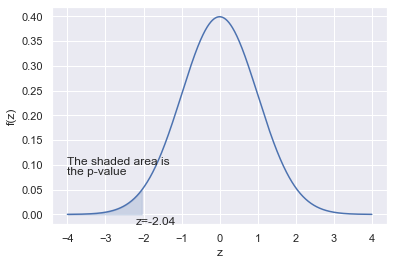

The p-value is, P(z<-2.04)= 0.02061341666858185


In [16]:
#Let's find the probability of x<x_bar
#In other words calculate the integral:
x=np.linspace(-4,4,1000)
std_normal_pdf=stats.norm.pdf(x)

fig=plt.plot(x,std_normal_pdf)
plt.xlabel("z")
plt.ylabel("f(z)")

t = np.arange(-4,4,1/40)
plt.fill_between(
        x= x, 
        y1= std_normal_pdf, 
        where= (-4 < x)&(x < z),
        color= "b",
        alpha= 0.2)
        

plt.text(-4,0.1,r'The shaded area is')
plt.text(-4,0.08,r'the p-value')
plt.text(-2.2,-0.02,'z=-2.04')


plt.show()

print('The p-value is, P(z<-2.04)=',stats.norm.cdf(z))

So the probability that the dog is healthy is 2%.

Is this good?

What do you think? Should we worry about the dog, or not? 

In other words, if $H_0$ is true, this is the probability that we got the results from a sample of a population of healthy dogs.

To decide if you will accept $H_0$, i.e. say that the dog is healthy, you need to decide before the test, what is your criterium for that decisiton.

The smaller the p-value, the greater is the probability the your zero hypothesis is not correct.

In biology we typically reject $H_0$ is the p-value is smaller than 5%. 

The right way to do this, to decide on a p-value threshold before the experiment.

This p-value criterium set before the experiment is: 

### Level of significance $\alpha$


The level of significance is the probability to reject $H_0$, when $H_0$ is true. 

This is one possible mistake (error) one can make.

#### Types of errors:


|$H_0$|    Don't reject $H_0$| Reject $H_0$| 
|-|-|-|
|$H_0$ is True|No Error|Type I Error|
|$H_0$ is False|Type II Error| No Error|


In terms of probabilities:

|$H_0$|    Don't reject $H_0$| Reject $H_0$| 
|-|-|-|
|$H_0$ is True|$1-\alpha$|$\alpha$|
|$H_0$ is False|$\beta$| $1-\beta$|

Why is the probability of Type II error not related to $\alpha$?


Because it is coming from a different distribution, not the one of $H_0$. 

In other words, $\beta$ is the probability to get the result of our experiment, but for the correct distribution where our sample comes from, not the one assumed by $H_0$.

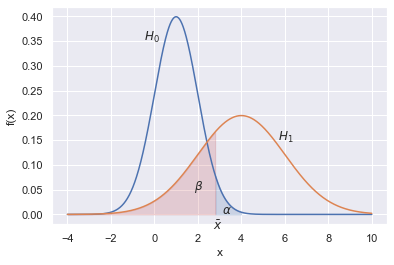

In [49]:
#Example
#H_0: The sample comes from a normal distribution with sigma=1 and x_bar=1
#H_1: The sample comes from a normal distribution with sigma=2 and x_bar=4

x=np.linspace(-4,10,1000)

H_0=stats.norm.pdf(x,loc=1,scale=1)

fig=plt.plot(x,H_0)
plt.xlabel("x")
plt.ylabel("f(x)")

X_bar=2.8

plt.fill_between(
        x= x, 
        y1= H_0, 
        where= (X_bar < x)&(x < 4),
        color= "b",
        alpha= 0.2)

H_1=stats.norm.pdf(x,loc=4,scale=2)

plt.plot(x,H_1)

plt.fill_between(
        x= x, 
        y1= H_1, 
        where= (-4 < x)&(x < X_bar),
        color= "r",
        alpha= 0.2)
        

plt.text(-0.5,0.35,r'$H_0$')
plt.text(5.7,0.15,r'$H_1$')
plt.text(2.7,-0.03,r'$\bar{x}$')
plt.text(1.8,0.05,r'$\beta$')
plt.text(3.1,0.001,r'$\alpha$')

plt.show()


|$H_0$|    Don't reject $H_0$| Reject $H_0$| 
|-|-|-|
|$H_0$ is True|$1-\alpha$|$\alpha$|
|$H_0$ is False|$\beta$| $1-\beta$|


#### Procedure for hypothesis testing:

1. Set your level of significance $\alpha$. 
2. Calculate the p-value.
3. If the p-value is smaller or equal to $\alpha$, reject $H_0$. The data are statistically significant, at the level of $\alpha$. 

### How do we find the p-value

1. Statistical z or t-test. This is OK, but you need to make assumptions about the population. Need large samples $n>30$ if you know nothing about the population.
2. Bootsrapping. Good if you have outliers. OK if the sample is a good representative of the population. Can create fake results.
3. Fisher exact test. Excellent, but computationally costly. These days that's not a problem.